<a href="https://colab.research.google.com/github/Shahi77/Severity-classification-of-software-code-smells/blob/main/dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import trim_mean, iqr
from scipy import stats

In [3]:
df1 = pd.read_csv('dataset-data-class.csv')
df2 = pd.read_csv('dataset-feature-envy.csv')
df3 = pd.read_csv('dataset-god-class.csv')
df4 = pd.read_csv('dataset-long-method.csv')

In [ ]:
# Check for missing values and data quality
print(df1.shape)
print(df1.isnull().sum())
print(df1.describe())
print(df1.info())

(420, 68)
dataset                                0
project                                0
package                                0
complextype                            0
severity                               0
                                      ..
number_protected_visibility_methods    0
number_public_visibility_methods       0
number_standard_design_methods         0
number_static_methods                  0
visibility_type                        0
Length: 68, dtype: int64
         severity  AMWNAMM_type    AMW_type   ATFD_type    CBO_type  \
count  420.000000    420.000000  420.000000  420.000000  420.000000   
mean     2.500000      3.460940    3.219355   15.314286   14.040476   
std      1.250298      5.594556    4.729016   34.857450   42.547469   
min      1.000000      0.000000    1.000000    0.000000    0.000000   
25%      1.000000      1.000000    1.000000    0.000000    1.000000   
50%      3.000000      1.500000    1.414286    0.000000    3.000000   
75%      4.000000

In [ ]:
print(df2.shape)
print(df2.isnull().sum())
print(df2.describe())
print(df2.info())

(420, 90)
dataset                                0
project                                0
package                                0
complextype                            0
method                                 0
                                      ..
number_protected_visibility_methods    0
number_public_visibility_methods       0
number_standard_design_methods         0
number_static_methods                  0
visibility_type                        0
Length: 90, dtype: int64
         severity  NOP_method   CC_method  ATFD_method  FDP_method  \
count  420.000000  420.000000  420.000000   420.000000  420.000000   
mean     1.664286    2.295238    0.588095     5.864286    1.697619   
std      0.996011    3.094144    1.522889    10.283948    2.499927   
min      1.000000    0.000000    0.000000     0.000000    0.000000   
25%      1.000000    1.000000    0.000000     0.000000    0.000000   
50%      1.000000    1.000000    0.000000     0.500000    0.500000   
75%      3.000000    3.0

In [ ]:
print(df3.shape)
print(df3.isnull().sum())
print(df3.info())

(420, 68)
dataset                                0
project                                0
package                                0
complextype                            0
severity                               0
                                      ..
number_protected_visibility_methods    0
number_public_visibility_methods       0
number_standard_design_methods         0
number_static_methods                  0
visibility_type                        0
Length: 68, dtype: int64
         severity  AMWNAMM_type    AMW_type   ATFD_type    CBO_type  \
count  420.000000    420.000000  420.000000  420.000000  420.000000   
mean     2.500000      3.542682    3.353657   15.935714   14.364286   
std      1.261699      5.635027    4.831007   35.195508   42.554900   
min      1.000000      0.000000    0.000000    0.000000    0.000000   
25%      1.000000      1.000000    1.000000    0.000000    0.750000   
50%      3.000000      1.600000    1.514045    0.000000    3.000000   
75%      4.000000

In [ ]:
print(df4.shape)
print(df4.isnull().sum())
print(df4.info())

(420, 90)
dataset                                0
project                                0
package                                0
complextype                            0
method                                 0
                                      ..
number_protected_visibility_methods    0
number_public_visibility_methods       0
number_standard_design_methods         0
number_static_methods                  0
visibility_type                        0
Length: 90, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 90 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   dataset                                           420 non-null    object 
 1   project                                           420 non-null    object 
 2   package                                           420 non-null    object 
 3   complexty

In [4]:
# Display first few rows of each dataset
print("Data Class:\n", df1.head())
print("Feature Envy:\n", df2.head())
print("God Class:\n", df3.head())
print("Long Method:\n", df4.head())


Data Class:
       dataset      project package           complextype  severity  \
0  data-class  fitjava-1.1     fat  DocumentParseFixture       1.0   
1  data-class  fitjava-1.1     fat            Frameworks       1.0   
2  data-class  fitjava-1.1     fat     TableParseFixture       1.0   
3  data-class  fitjava-1.1     fat                Divide       1.0   
4  data-class  fitjava-1.1     fat    FixtureNameFixture       1.0   

   AMWNAMM_type  AMW_type  ATFD_type  CBO_type  CFNAMM_type  ...  \
0           1.5       1.5        3.0       5.0          2.0  ...   
1           2.0       2.0        0.0       5.0          0.0  ...   
2           1.0       1.0        2.0       5.0          2.0  ...   
3           1.0       1.0        0.0       5.0          0.0  ...   
4           2.0       2.0        0.0       5.0          3.0  ...   

   number_package_visibility_attributes  number_package_visibility_methods  \
0                                   0.0                                0.0   
1

In [5]:
# Check for null values and data types
for i, df in enumerate([df1, df2, df3, df4], 1):
    print(f"\nDataset {i} Information:\n")
    print(df.info())
    print(f"\nNull Values in Dataset {i}:\n")
    print(df.isnull().sum())

# Basic statistics for each dataset
for i, df in enumerate([df1, df2, df3, df4], 1):
    print(f"\nDescriptive Statistics for Dataset {i}:\n")
    print(df.describe())



Dataset 1 Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 68 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   dataset                                           420 non-null    object 
 1   project                                           420 non-null    object 
 2   package                                           420 non-null    object 
 3   complextype                                       420 non-null    object 
 4   severity                                          420 non-null    float64
 5   AMWNAMM_type                                      420 non-null    float64
 6   AMW_type                                          420 non-null    float64
 7   ATFD_type                                         420 non-null    float64
 8   CBO_type                                          420 non-null    float64
 

In [13]:
# Checking for imbalance in the dataset (assuming a target column 'class')
for i, df in enumerate([df1, df2, df3, df4], 1):
    if 'class' in df.columns:
        print(f"\nClass distribution in Dataset {i}:")
        print(df['class'].value_counts(normalize=True) * 100)


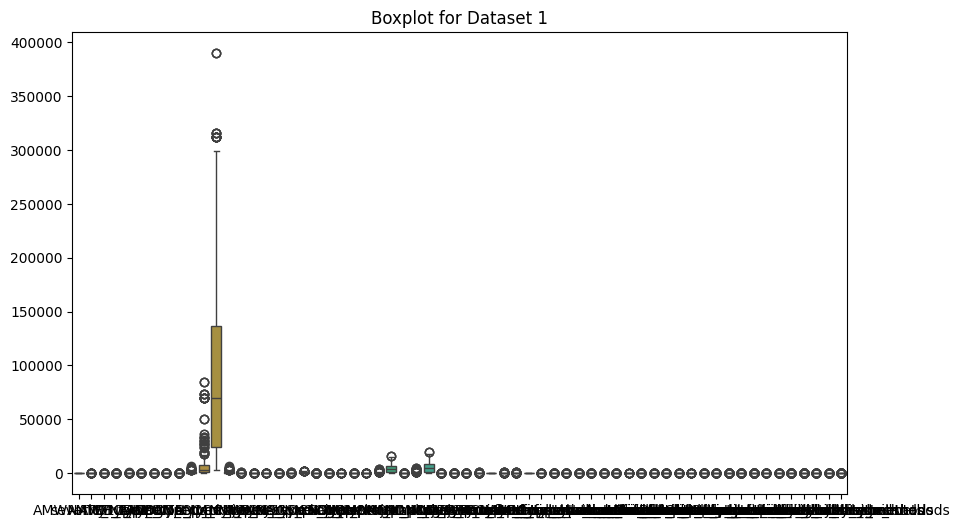

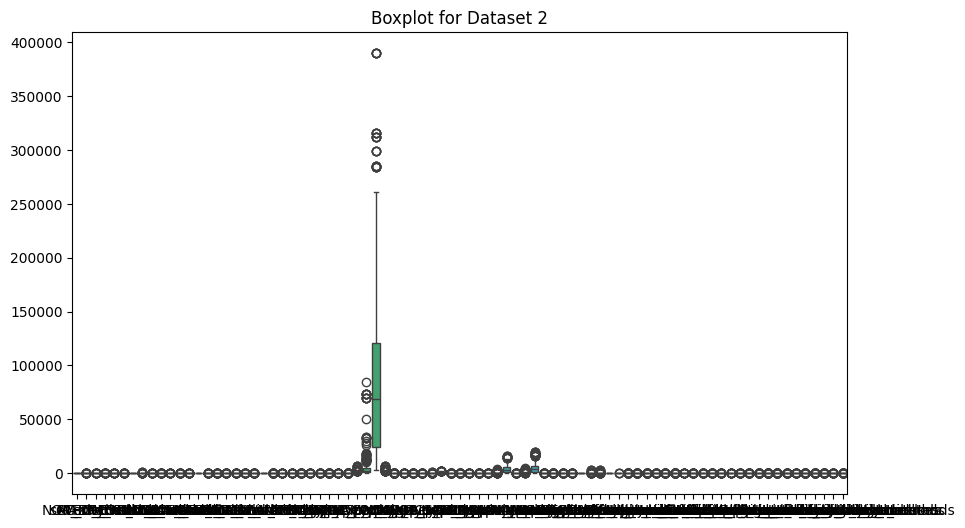

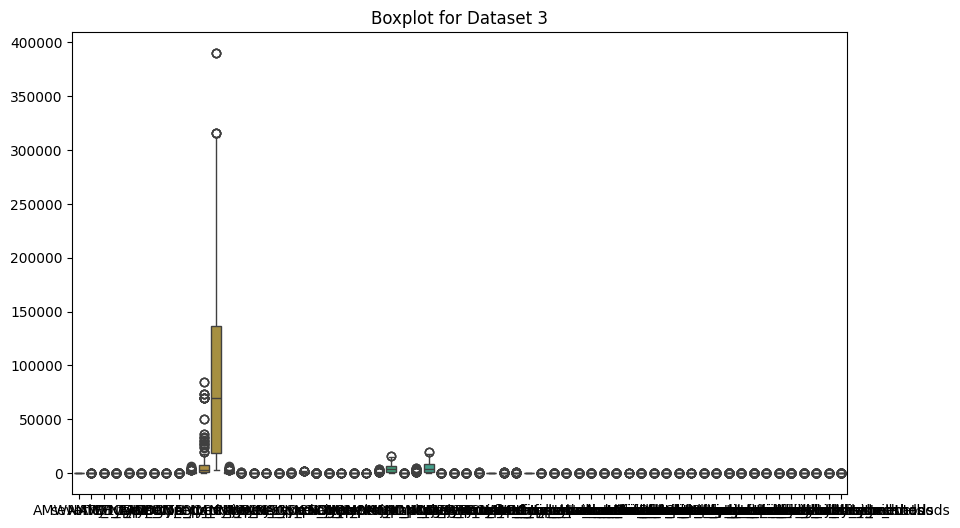

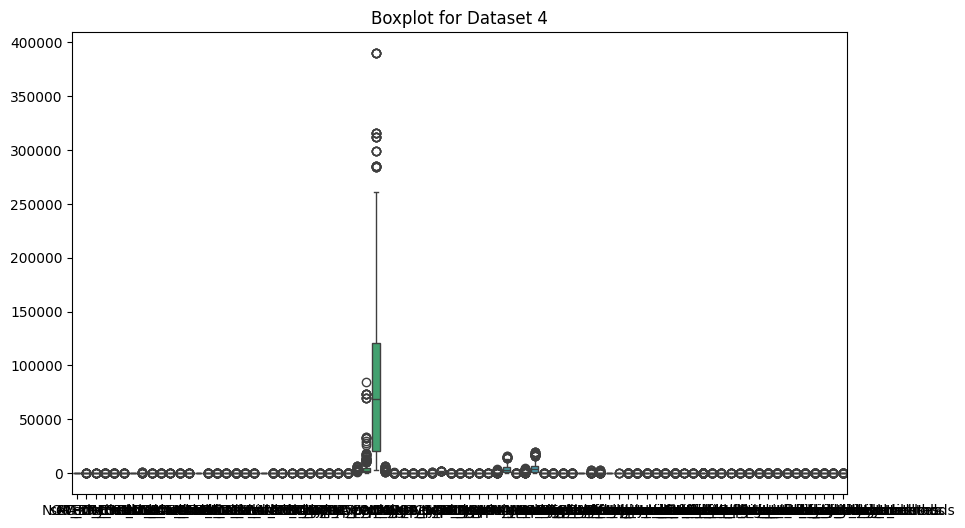


Dataset 1 cleaned. Rows before: 420, after: 246

Dataset 2 cleaned. Rows before: 420, after: 229

Dataset 3 cleaned. Rows before: 420, after: 239

Dataset 4 cleaned. Rows before: 420, after: 220


In [7]:
# Boxplot to visualize outliers
for i, df in enumerate([df1, df2, df3, df4], 1):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df)
    plt.title(f'Boxplot for Dataset {i}')
    plt.show()

# Removing outliers using Z-score method (absolute Z-score > 3 are outliers)
for i, df in enumerate([df1, df2, df3, df4], 1):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
    df_clean = df[(z_scores < 3).all(axis=1)]
    print(f"\nDataset {i} cleaned. Rows before: {df.shape[0]}, after: {df_clean.shape[0]}")


In [14]:
# Filling missing values with mean
for i, df in enumerate([df1, df2, df3, df4], 1):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=np.number).columns
    # Fill missing values with the mean of each numeric column
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    # Print results
    print(f"\nDataset {i} - After Handling Missing Values")
    print(df.isnull().sum())




Dataset 1 - After Handling Missing Values
dataset                                0
project                                0
package                                0
complextype                            0
severity                               0
                                      ..
number_protected_visibility_methods    0
number_public_visibility_methods       0
number_standard_design_methods         0
number_static_methods                  0
visibility_type                        0
Length: 68, dtype: int64

Dataset 2 - After Handling Missing Values
dataset                                0
project                                0
package                                0
complextype                            0
method                                 0
                                      ..
number_protected_visibility_methods    0
number_public_visibility_methods       0
number_standard_design_methods         0
number_static_methods                  0
visibility_type             

In [9]:
from imblearn.over_sampling import SMOTE

# Example of SMOTE if imbalance is detected (only for binary classification)
for i, df in enumerate([df1, df2, df3, df4], 1):
    if 'class' in df.columns and df['class'].nunique() == 2:
        X = df.drop('class', axis=1)
        y = df['class']
        smote = SMOTE()
        X_resampled, y_resampled = smote.fit_resample(X, y)
        df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['class'])], axis=1)
        print(f"\nDataset {i} Resampled. Class Distribution:\n")
        print(df_resampled['class'].value_counts())



Dataset 1 - Statistical Measures:
Mean: 
severity                                   2.500000
AMWNAMM_type                               3.460940
AMW_type                                   3.219355
ATFD_type                                 15.314286
CBO_type                                  14.040476
                                            ...    
number_protected_visibility_attributes     3.014286
number_protected_visibility_methods        1.821429
number_public_visibility_methods          15.333333
number_standard_design_methods            14.645238
number_static_methods                      2.240476
Length: 62, dtype: float64
75th Percentile: 
severity                                   4.000000
AMWNAMM_type                               4.242260
AMW_type                                   3.688425
ATFD_type                                 13.000000
CBO_type                                  16.250000
                                            ...    
number_protected_visibility_a

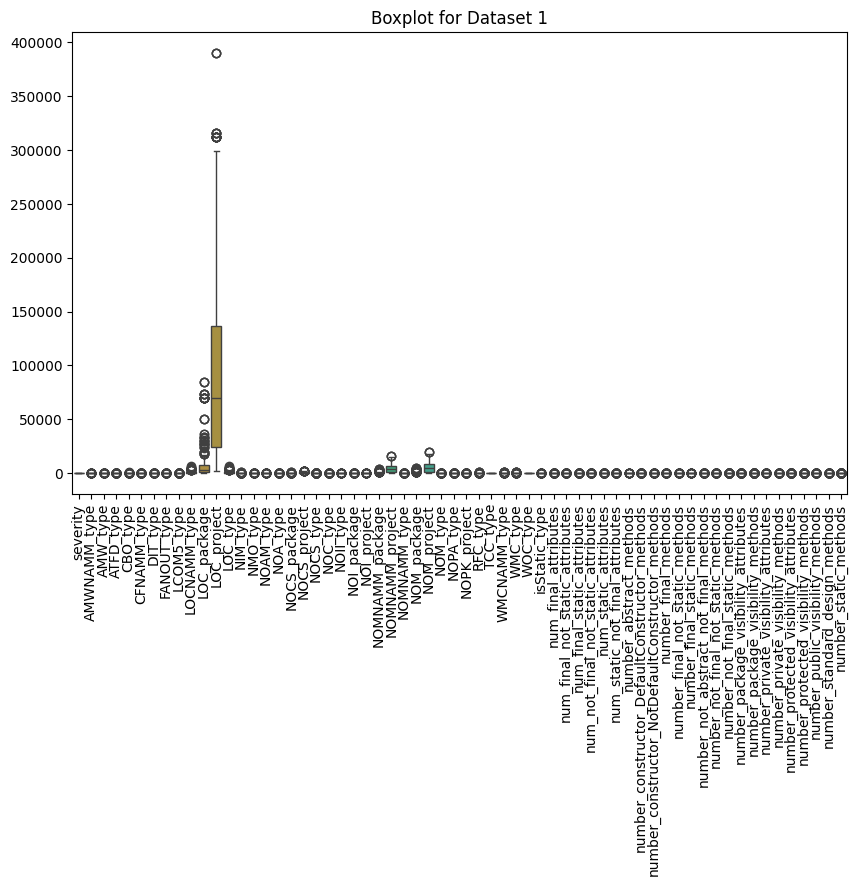


Dataset 2 - Statistical Measures:
Mean: 
severity                                   1.664286
NOP_method                                 2.295238
CC_method                                  0.588095
ATFD_method                                5.864286
FDP_method                                 1.697619
                                            ...    
number_protected_visibility_attributes     2.252381
number_protected_visibility_methods        2.154762
number_public_visibility_methods          12.600000
number_standard_design_methods            17.619048
number_static_methods                      2.054762
Length: 83, dtype: float64
75th Percentile: 
severity                                   3.00
NOP_method                                 3.00
CC_method                                  1.00
ATFD_method                                9.00
FDP_method                                 3.00
                                          ...  
number_protected_visibility_attributes     0.00
numbe

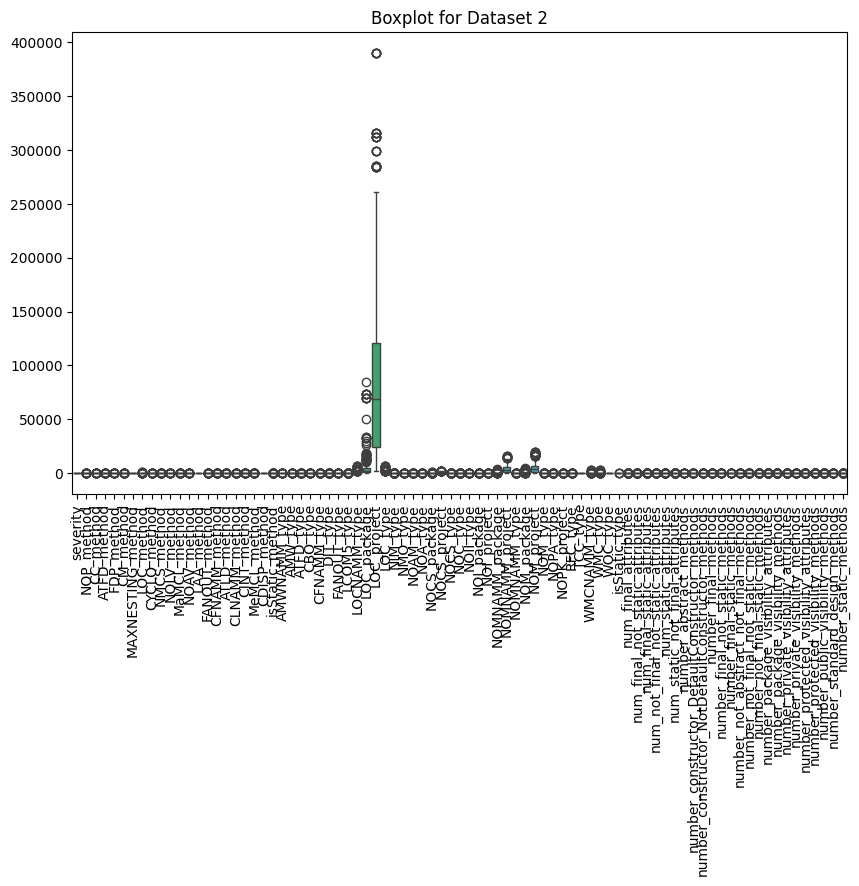


Dataset 3 - Statistical Measures:
Mean: 
severity                                   2.500000
AMWNAMM_type                               3.542682
AMW_type                                   3.353657
ATFD_type                                 15.935714
CBO_type                                  14.364286
                                            ...    
number_protected_visibility_attributes     3.009524
number_protected_visibility_methods        1.911905
number_public_visibility_methods          15.826190
number_standard_design_methods            15.557143
number_static_methods                      2.411905
Length: 62, dtype: float64
75th Percentile: 
severity                                   4.000000
AMWNAMM_type                               4.452346
AMW_type                                   3.923077
ATFD_type                                 14.000000
CBO_type                                  17.500000
                                            ...    
number_protected_visibility_a

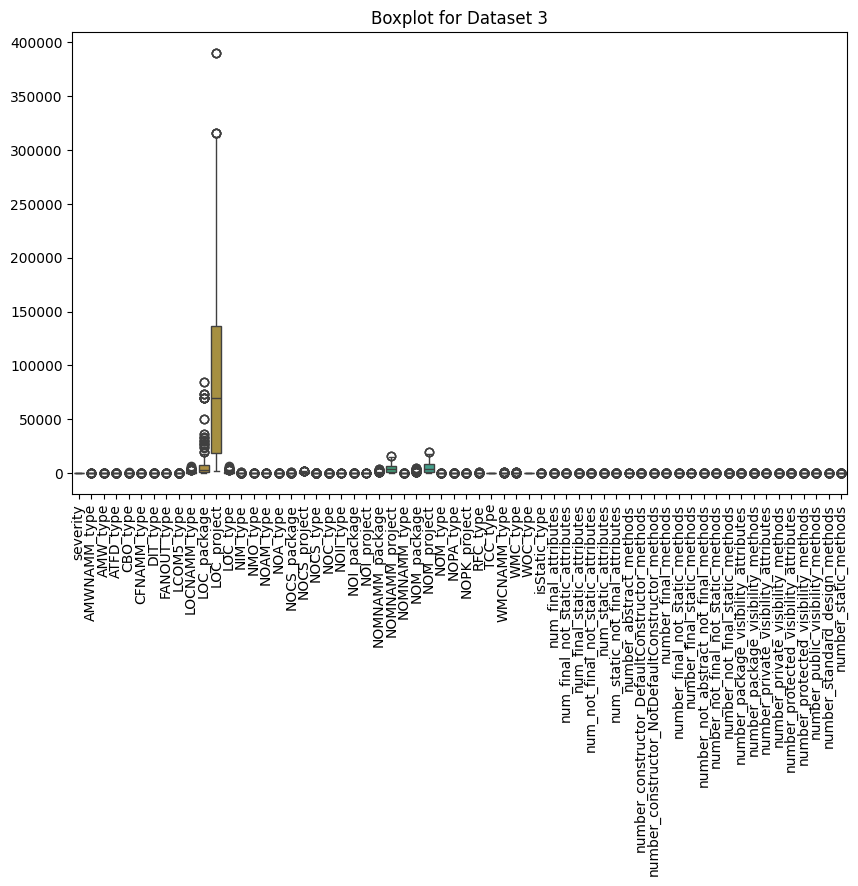


Dataset 4 - Statistical Measures:
Mean: 
severity                                   1.721429
NOP_method                                 2.188095
CC_method                                  0.564286
ATFD_method                                5.161905
FDP_method                                 1.514286
                                            ...    
number_protected_visibility_attributes     2.014286
number_protected_visibility_methods        2.190476
number_public_visibility_methods          12.400000
number_standard_design_methods            17.564286
number_static_methods                      2.069048
Length: 83, dtype: float64
75th Percentile: 
severity                                   3.0
NOP_method                                 3.0
CC_method                                  1.0
ATFD_method                                7.0
FDP_method                                 2.0
                                          ... 
number_protected_visibility_attributes     0.0
number_prote

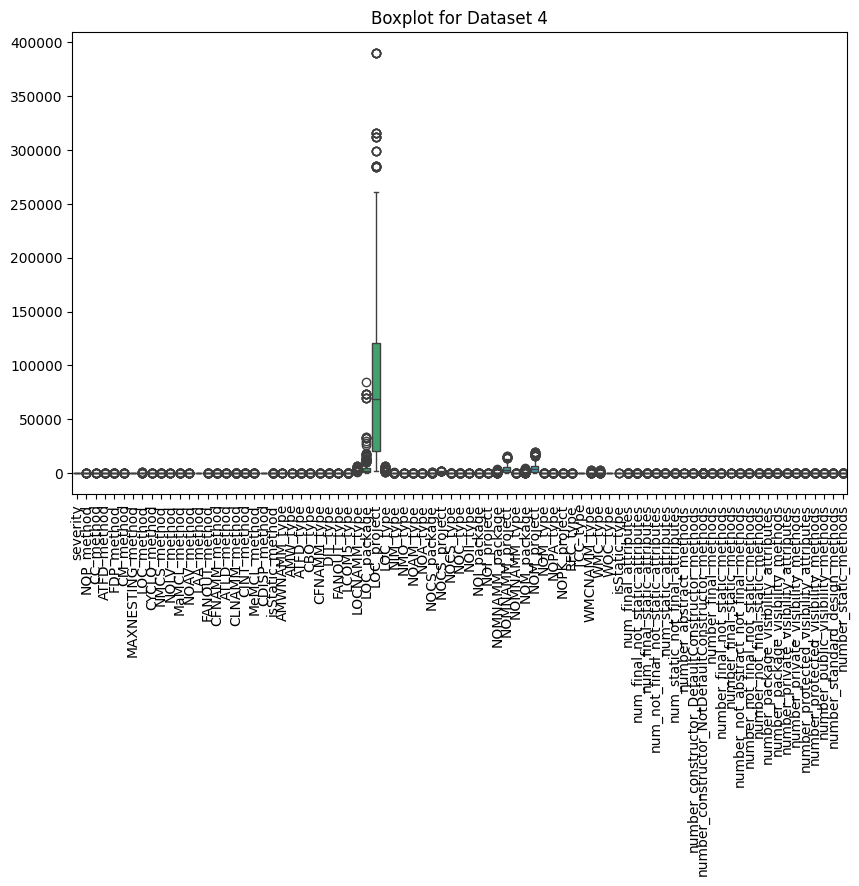

In [16]:
for i, df in enumerate([df1, df2, df3, df4], 1):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=np.number)

    print(f"\nDataset {i} - Statistical Measures:")
    print(f"Mean: \n{numeric_cols.mean()}")
    print(f"75th Percentile: \n{numeric_cols.quantile(0.75)}")
    print(f"25th Percentile: \n{numeric_cols.quantile(0.25)}")
    print(f"Median: \n{numeric_cols.median()}")
    print(f"Third Quartile (Q3): \n{numeric_cols.quantile(0.75)}")

    # Boxplot for outliers in numeric columns
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=numeric_cols)
    plt.title(f'Boxplot for Dataset {i}')
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
    plt.show()



In [11]:
# Trimmed mean, median, and standard deviation (trimming 10% of data)
for i, df in enumerate([df1, df2, df3, df4], 1):
    trimmed_mean = stats.trim_mean(df.select_dtypes(include=np.number), proportiontocut=0.1)
    trimmed_median = df.select_dtypes(include=np.number).apply(lambda x: np.median(stats.trimboth(x, proportiontocut=0.1)))
    trimmed_std = df.select_dtypes(include=np.number).apply(lambda x: np.std(stats.trimboth(x, proportiontocut=0.1)))

    print(f"\nDataset {i} - Trimmed Mean: {trimmed_mean}")
    print(f"Dataset {i} - Trimmed Median: {trimmed_median}")
    print(f"Dataset {i} - Trimmed Std Dev: {trimmed_std}")



Dataset 1 - Trimmed Mean: [2.50000000e+00 2.45705510e+00 2.21738140e+00 6.28571429e+00
 7.68154762e+00 1.10654762e+01 1.50595238e+00 5.01488095e+00
 7.96439069e-01 3.49854167e+02 4.45266071e+03 8.16807351e+04
 3.93889881e+02 7.13690476e+00 2.41071429e-01 4.16071429e+00
 9.10119048e+00 2.73720238e+01 6.04553571e+02 2.55952381e-01
 5.05952381e-02 2.88690476e-01 1.41666667e+00 5.09910714e+01
 1.89241071e+02 4.00345833e+03 9.61904762e+00 2.43687500e+02
 4.92173214e+03 1.48869048e+01 1.36607143e+00 3.46160714e+01
 4.08244048e+01 3.72063225e-01 4.63333333e+01 5.35476190e+01
 4.20279023e-01 0.00000000e+00 2.22619048e+00 2.67857143e-02
 1.77976190e+00 5.12797619e+00 2.08928571e+00 4.16666667e-02
 0.00000000e+00 6.84523810e-02 9.31547619e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.42202381e+01 1.30982143e+01
 2.05357143e-01 1.63690476e-01 1.96428571e-01 3.60416667e+00
 1.14583333e+00 4.52380952e-01 3.69047619e-01 9.47619048e+00
 8.48511905e+00 2.47023810e-01]
Dataset 1 - Trimmed Median

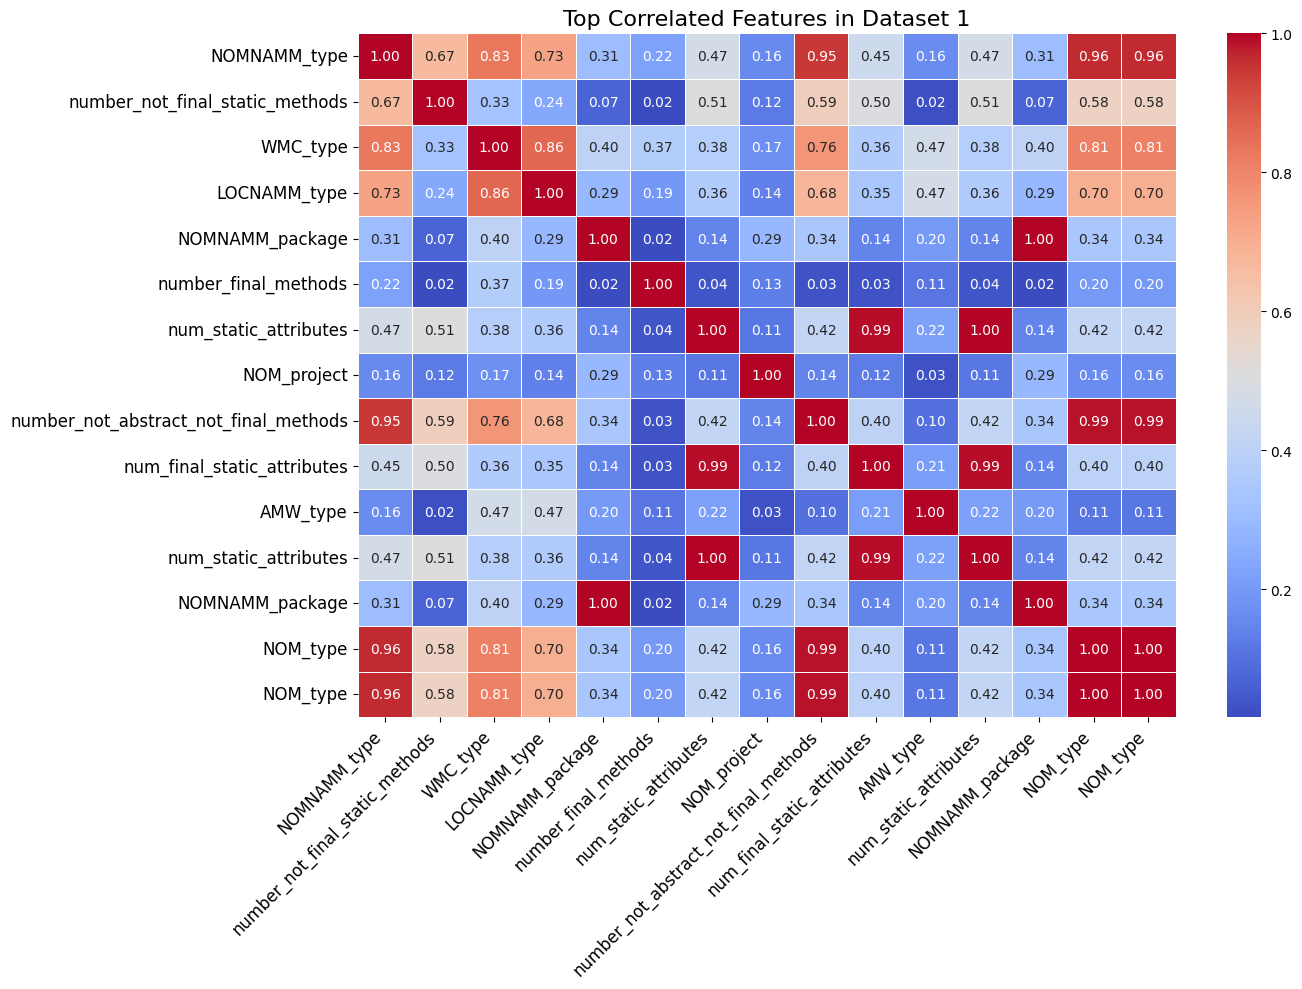

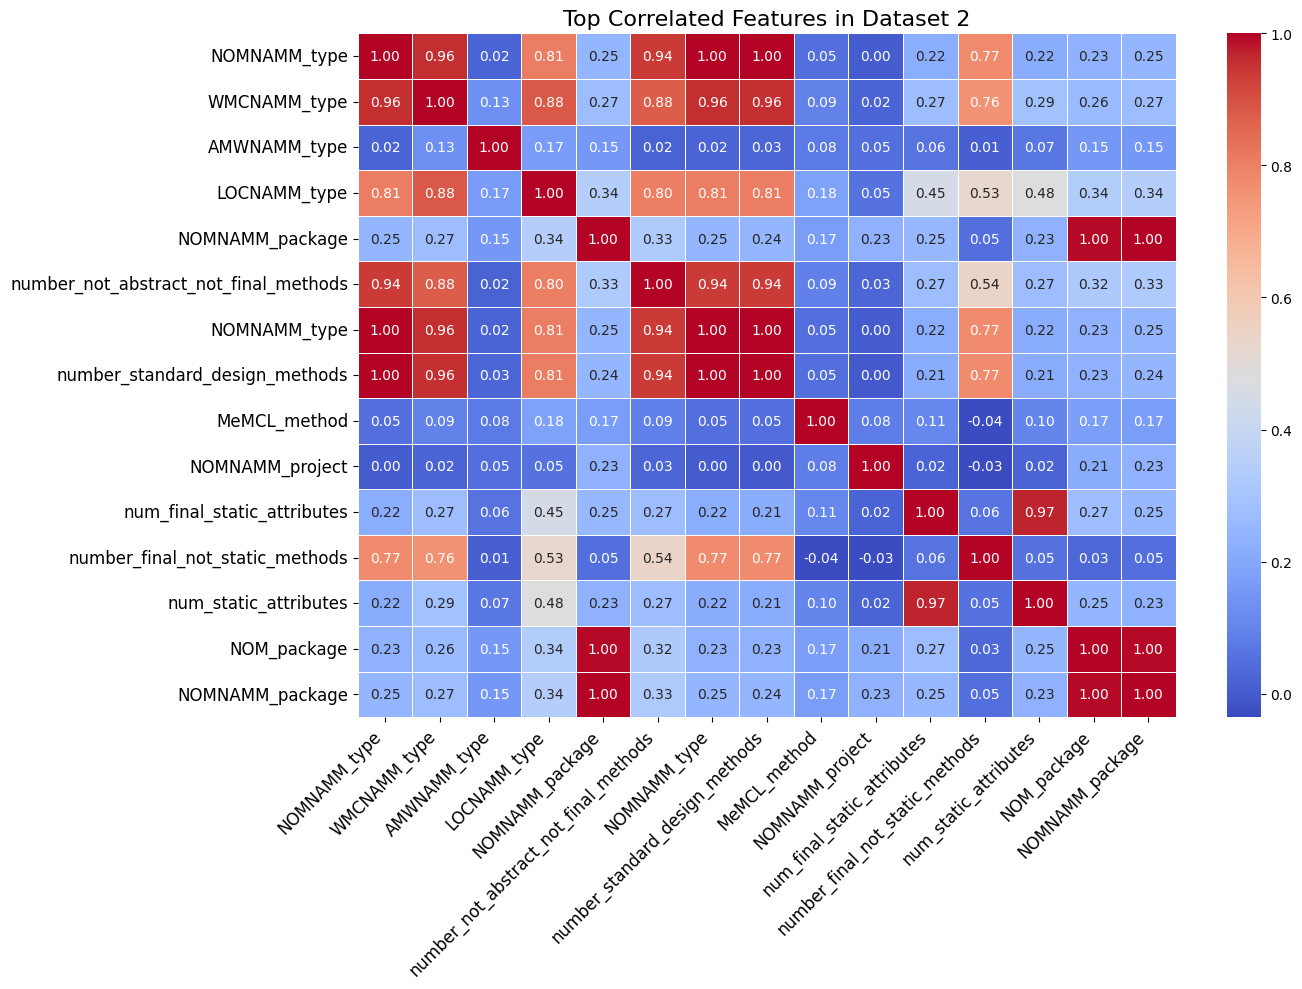

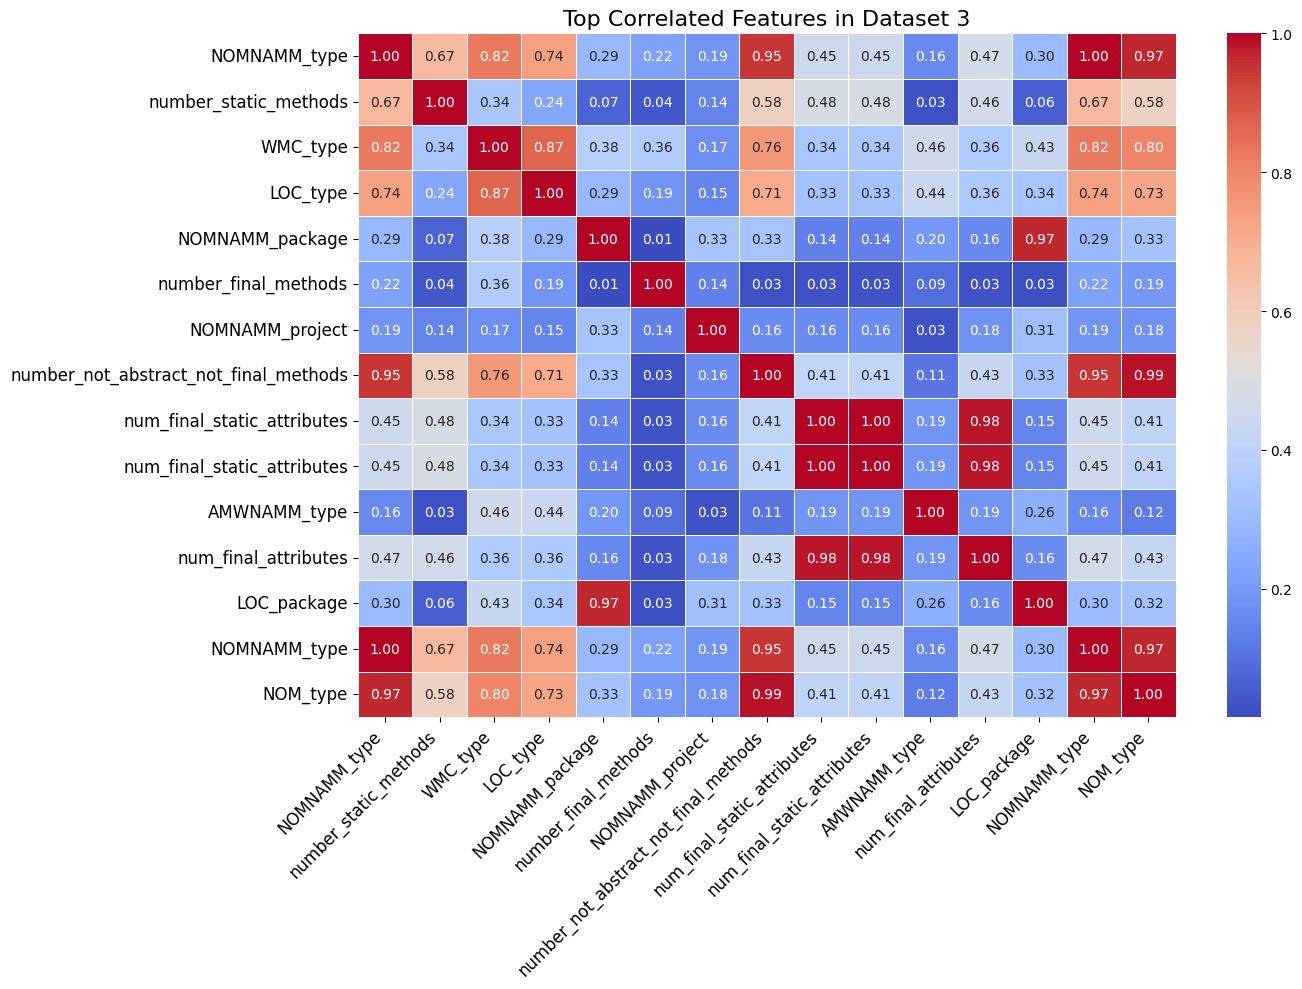

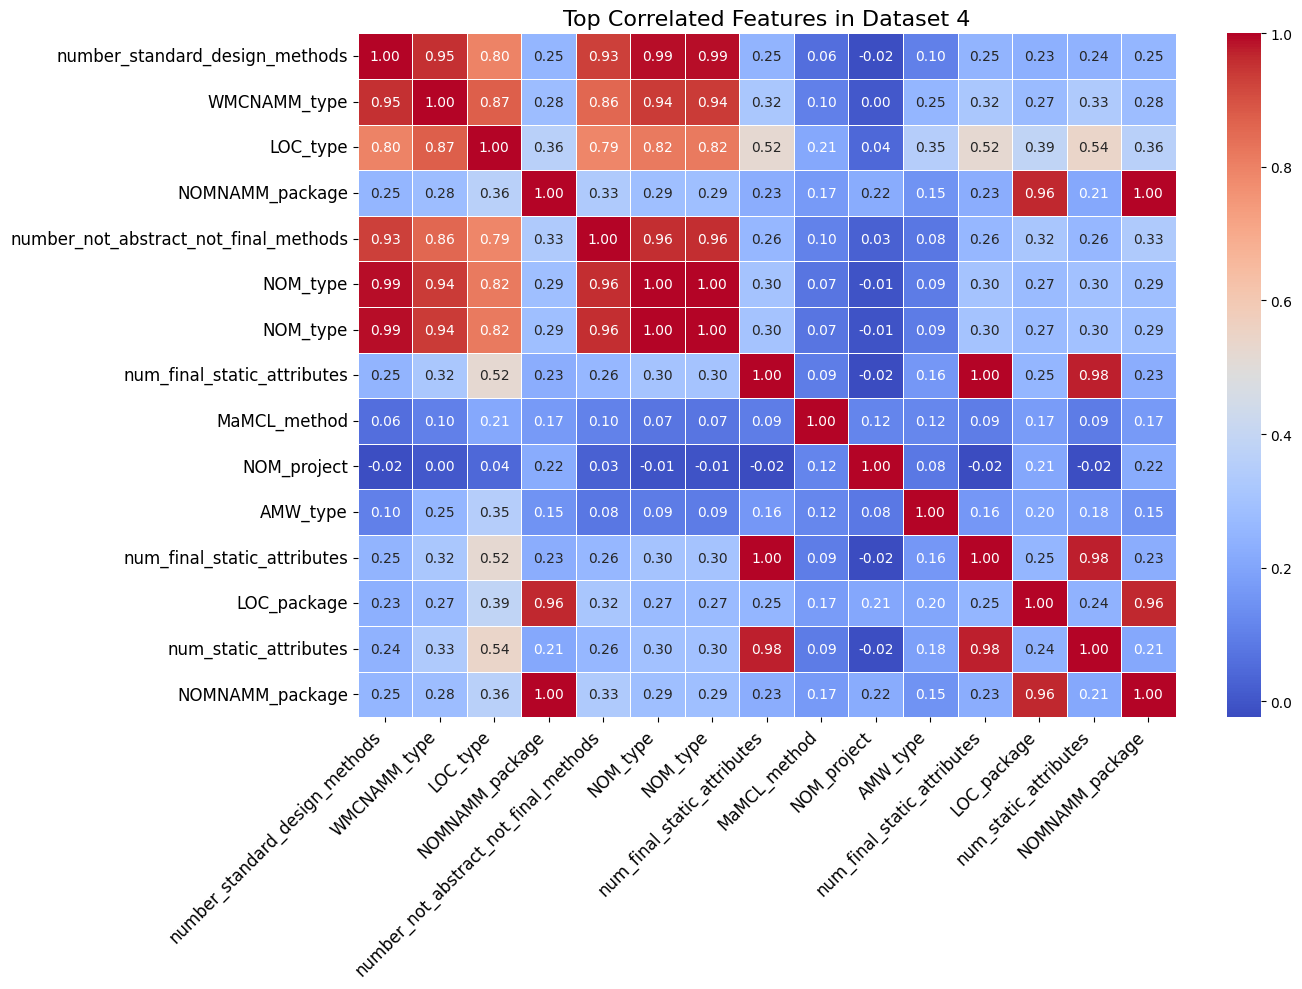

In [25]:
# Function to get top N correlated features
def top_n_corr_features(df, n=10, threshold=0.6):
    corr_matrix = df.corr().abs()  # Get the absolute values of correlations
    high_corr_vars = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)

    # Filter out self-correlations and keep only those above the threshold
    filtered_corr = high_corr_vars[(high_corr_vars < 1) & (high_corr_vars >= threshold)]

    return filtered_corr.drop_duplicates().nlargest(n)

for i, df in enumerate([df1, df2, df3, df4], 1):
    numeric_cols = df.select_dtypes(include=np.number)

    if not numeric_cols.empty:
        top_corr = top_n_corr_features(numeric_cols, n=15, threshold=0.7)
        if not top_corr.empty:
            plt.figure(figsize=(14, 10))  # Larger size for better visibility
            sns.heatmap(
                numeric_cols[top_corr.index.get_level_values(0)].corr(),
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                annot_kws={"size": 10},  # Smaller size to fit more annotations
                linewidths=0.5,
            )
            plt.title(f'Top Correlated Features in Dataset {i}', fontsize=16)
            plt.xticks(rotation=45, ha='right', fontsize=12)
            plt.yticks(fontsize=12)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Dataset {i} has no correlations above the threshold for visualization.")
    else:
        print(f"Dataset {i} has no numeric columns for correlation.")


In [22]:
# Function to get top N correlated features
def top_n_corr_features(df, n=10):
    corr_matrix = df.corr().abs().unstack()
    sorted_corr = corr_matrix.sort_values(kind="quicksort", ascending=False).drop_duplicates()
    return sorted_corr[sorted_corr < 1].nlargest(n)

# Number of top correlations to display
n = 10

for i, df in enumerate([df1, df2, df3, df4], 1):
    numeric_cols = df.select_dtypes(include=np.number)

    if not numeric_cols.empty:
        print(f"\nTop {n} Correlated Features for Dataset {i}")
        top_corr = top_n_corr_features(numeric_cols, n)
        print(top_corr)
    else:
        print(f"Dataset {i} has no numeric columns for correlation.")




Top 10 Correlated Features for Dataset 1
NOMNAMM_type                           number_standard_design_methods     0.999220
number_not_final_static_methods        number_static_methods              0.999217
WMC_type                               WMCNAMM_type                       0.996011
LOCNAMM_type                           LOC_type                           0.995183
NOMNAMM_package                        NOM_package                        0.993118
number_final_methods                   number_final_not_static_methods    0.992371
num_static_attributes                  num_final_static_attributes        0.990587
NOM_project                            NOMNAMM_project                    0.988518
number_not_abstract_not_final_methods  NOM_type                           0.985819
num_final_static_attributes            num_final_attributes               0.982900
dtype: float64

Top 10 Correlated Features for Dataset 2
NOMNAMM_type                           number_standard_design_methods  